In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

In [ ]:
titanic_data = fetch_openml("titanic" , version = 1 , as_frame = True)

In [ ]:
df =  titanic_data['data']

In [ ]:
df['survived'] = titanic_data['target']

In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
df['family'] = df['sibsp'] + df['parch']
df.loc[df['family'] > 0,'travelled_alone'] = 0
df.loc[df['family'] == 0,'travelled_alone'] = 1

In [ ]:
df['family'].head()

,family
0,0
1,3
2,3
3,3
4,3


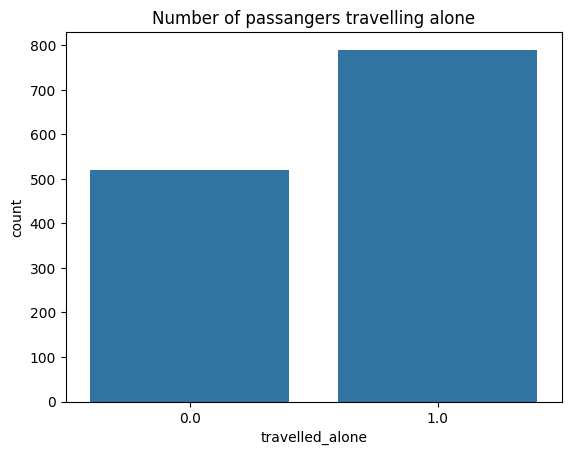

In [ ]:
df.drop(['sibsp' , 'parch'] , axis =1 , inplace = True)
sns.countplot(x= 'travelled_alone' , data = df)
plt.title("Number of passangers travelling alone")
plt.show()

<Axes: xlabel='survived', ylabel='count'>

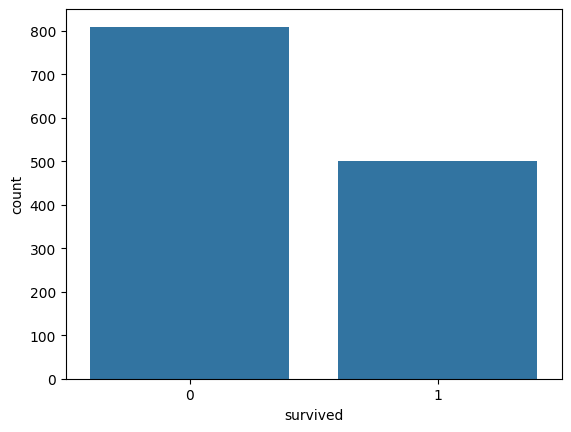

In [ ]:
sns.countplot(x = "survived" , data = df)

<Axes: xlabel='survived', ylabel='count'>

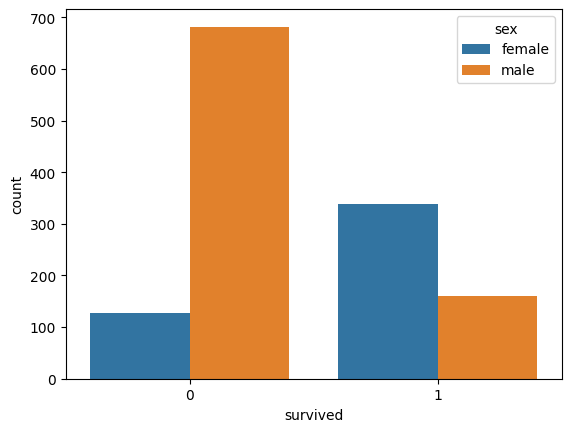

In [ ]:
sns.countplot(x = "survived" , hue = "sex" , data = df )

<Axes: xlabel='survived', ylabel='count'>

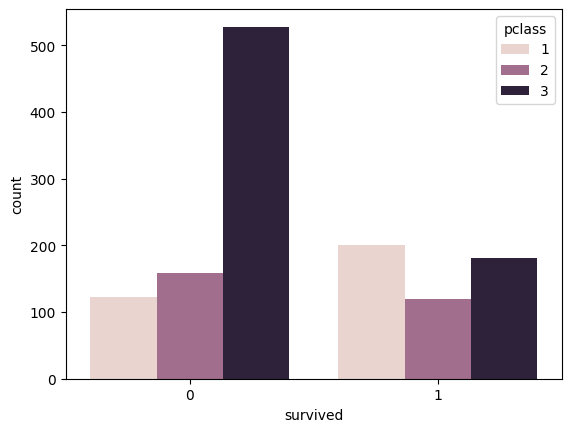

In [ ]:
sns.countplot(x = "survived" , hue = "pclass" , data = df )

<Axes: ylabel='Frequency'>

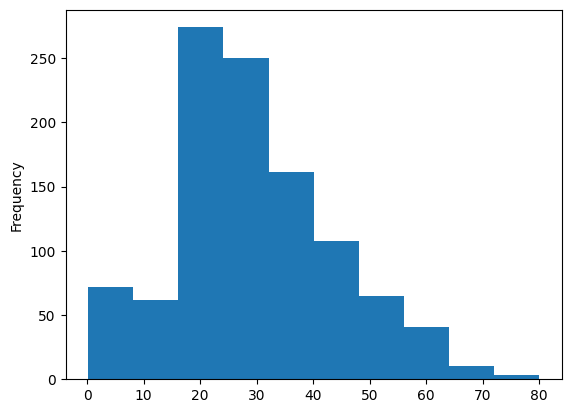

In [ ]:
df['age'].plot.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [ ]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


<Axes: title={'center': 'missing values in percentage'}, ylabel='percentage'>

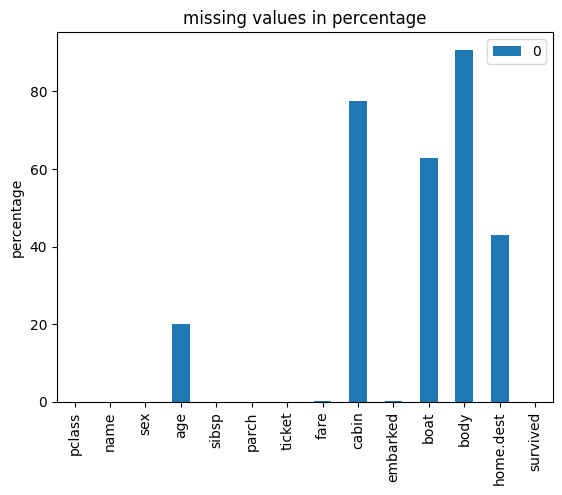

In [ ]:
miss_vals = pd.DataFrame(df.isnull().sum()/len(df)*100 )
miss_vals.plot(kind = 'bar' , title = 'missing values in percentage' , ylabel = 'percentage')

In [ ]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [ ]:
df.drop(['name' , 'ticket' , 'home.dest'] , axis = 1 , inplace = True)

In [ ]:
df.drop(['cabin' , 'body' , 'boat'] , axis = 1 , inplace = True)

In [ ]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [ ]:
sex = pd.get_dummies(df['sex'] , drop_first = True).astype(int)
print(sex)

      male
0        0
1        1
2        0
3        1
4        0
...    ...
1304     0
1305     0
1306     1
1307     1
1308     1

[1309 rows x 1 columns]


In [ ]:
df['sex'] = sex

In [ ]:
df.isnull().sum()

,0
pclass,0
sex,0
age,263
fare,1
embarked,2
survived,0
family,0
travelled_alone,0


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
df['age'] = imp_mean.fit_transform(df[['age']])

In [ ]:
df['fare'] = imp_mean.fit_transform(df[['fare']])

In [ ]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
travelled_alone,0


In [ ]:
imp_freq = SimpleImputer(strategy='most_frequent')
df['embarked'] = imp_freq.fit_transform(df[['embarked']]).ravel()

In [ ]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,0
survived,0
family,0
travelled_alone,0


In [ ]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,0,29.0000,211.3375,S,1,0,1.0
1,1,1,0.9167,151.5500,S,1,3,0.0
2,1,0,2.0000,151.5500,S,0,3,0.0
3,1,1,30.0000,151.5500,S,0,3,0.0
4,1,0,25.0000,151.5500,S,0,3,0.0


In [ ]:
embark = pd.get_dummies(df['embarked'] , drop_first = True).astype(int)
print(embark)

      Q  S
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
1304  0  0
1305  0  0
1306  0  0
1307  0  0
1308  0  1

[1309 rows x 2 columns]


In [ ]:
df.drop(['embarked'] , axis = 1,inplace = True ,errors='ignore')
df = pd.concat([df,embark] , axis = 1)

In [ ]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,0,29.0000,211.3375,1,0,1.0,0,1
1,1,1,0.9167,151.5500,1,3,0.0,0,1
2,1,0,2.0000,151.5500,0,3,0.0,0,1
3,1,1,30.0000,151.5500,0,3,0.0,0,1
4,1,0,25.0000,151.5500,0,3,0.0,0,1


In [ ]:
X = df.drop(['survived'] , axis = 1)
y = df['survived']

In [ ]:
X.head()

,pclass,sex,age,fare,family,travelled_alone,Q,S
0,1,0,29.0000,211.3375,0,1.0,0,1
1,1,1,0.9167,151.5500,3,0.0,0,1
2,1,0,2.0000,151.5500,3,0.0,0,1
3,1,1,30.0000,151.5500,3,0.0,0,1
4,1,0,25.0000,151.5500,3,0.0,0,1


In [ ]:
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 1)

In [ ]:
print(X_train.shape , y_train.shape)

(916, 8) (916,)


In [ ]:
print(X_test.shape , y_test.shape)

(393, 8) (393,)


In [ ]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = mod.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , pred)

0.7989821882951654

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , pred)

array([[204,  32],
       [ 47, 110]])